<a href="https://colab.research.google.com/github/Rajat504/CLOUDYML/blob/main/spacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SpaCy is an open-source and free library for Natural Language Processing (NLP) in Python having a lot of in-built functionalities. It’s becoming popular for processing and analyzing data in NLP. Unstructured text data is produced in a large quantity, and it is important to process and extract insights from unstructured data. To do this, we need to represent the data in a format that can be understood by machines. NLP will help us to do that.

There are also other alternatives for performing NLP tasks using NLTK, Genism, and flair libraries.

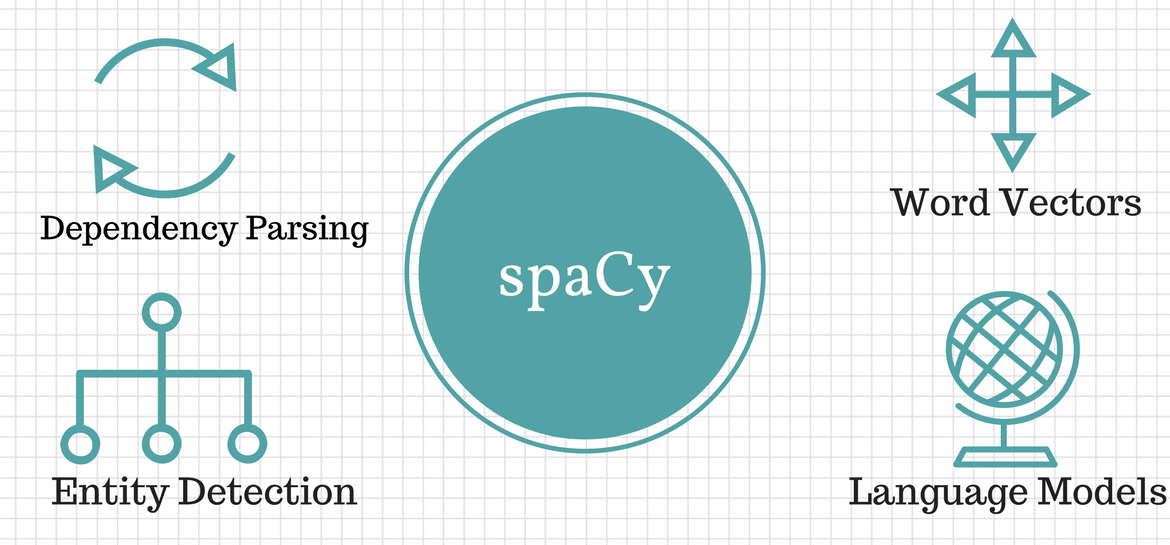

Reference Link:
https://spacy.io/usage/spacy-101#whats-spacy

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-24 00:47:45.354916: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 12.4 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


en_core is a language that represents English, web means web interface and sm means small model. now let us define any text document which is in Unicode format. then we will tokenize the text.

In [ ]:
doc = nlp(u'Microsoft is trying to buy France based startup at $7 Million')
for token in doc:
  print(token.text)

Microsoft
is
trying
to
buy
France
based
startup
at
$
7
Million


if we slice some part of the document then it is known as span.

1) Tokenization

Tokenization is a technique in which complete text or document is divided into small chunks to better understand the data. Spacy keeps expertise in tokenizing the text because it better understands the punctuations, links in a text which we have seen in the above example. But the thing is text document is not mutable, which means you cannot replace any text in the document with new text because spacy considers the document to consist of important information.

#####Chunking

In [ ]:
doc4 = nlp("tesla is a automobile based endorsed with high tech work for implimenting the electric cars")
for chunks in doc4.noun_chunks:
  print(chunks)

tesla
a automobile
high tech work
the electric cars


complex text then we tokenize it based on chunks. for example, if we have more noun chunks in a document so we can easily extract them.

In [ ]:
from spacy import displacy
doc = nlp(u'Tesla to build solar electric startup in gujrat for $70 million')
displacy.render(doc, style='dep', jupyter=True, options = {'distance':100})

2) Phrase Matching

Phase Matching is a similar concept as a regular expression in which you can find the phrase in the document as per your created phrases. If you want to use patterns that you have created then you have to use vocabulary Matching.

In [ ]:
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)
matcher = Matcher(nlp.vocab)
#solarpower
pattern1 = [{'LOWER':'solarpower'}]
#solar power
pattern2 = [{'LOWER':'solar'},{'LOWER':'power'}]
#solar-power
pattern3 = [{'LOWER':'solar'},{"IS_PUNCT": True},{'LOWER':'power'}]
# pattern=[[{'LOWER':'solarpower'},
#           {'LOWER':'solar'},{'LOWER':'power'},
#           {'LOWER':'solar'},{"IS_PUNCT": True},{'LOWER':'power'}
#           ]]
matcher.add('SolarPower',[pattern1])
doc = nlp(u'The Solar Power industry continues to grow as demand for solarpower increases. solar-power operated products are popularity')
found_matches = matcher(doc)
print(found_matches)

[(8656102463236116519, 10, 11)]


In [ ]:
for match_id, start, end in found_matches:
  string_id = nlp.vocab.strings[match_id]
  span = doc[start:end]
  print(match_id, string_id, start, end, span.text)


8656102463236116519 SolarPower 10 11 solarpower


3) Part of Speech(POS) Tagging

POS tagging is a method of automatically assigning POS tags to all the words of a document. POS tagging is of 2 types. one is a course in which normal words come like nouns, verbs, and adjectives. Second is a fine-grained text which includes words that provide some special information like plural noun, past or present tense, superlative adjective, etc.

In [ ]:
doc = nlp(u'The quick brown fox, snatch the piece of cube from mouth of black crow')
for token in doc:
  print(f"{token.text:{10}} {token.pos_:{10}} {token.tag_:{10}} {spacy.explain(token.tag_)}")

The        DET        DT         determiner
quick      ADJ        JJ         adjective (English), other noun-modifier (Chinese)
brown      ADJ        JJ         adjective (English), other noun-modifier (Chinese)
fox        NOUN       NN         noun, singular or mass
,          PUNCT      ,          punctuation mark, comma
snatch     VERB       VB         verb, base form
the        DET        DT         determiner
piece      NOUN       NN         noun, singular or mass
of         ADP        IN         conjunction, subordinating or preposition
cube       NOUN       NN         noun, singular or mass
from       ADP        IN         conjunction, subordinating or preposition
mouth      NOUN       NN         noun, singular or mass
of         ADP        IN         conjunction, subordinating or preposition
black      ADJ        JJ         adjective (English), other noun-modifier (Chinese)
crow       NOUN       NN         noun, singular or mass


In [ ]:
pos_counts = doc.count_by(spacy.attrs.POS)
print(pos_counts)
print(doc.vocab[92].text) #check which POS

{90: 2, 84: 3, 92: 5, 97: 1, 100: 1, 85: 3}
NOUN


Graph of synthetic dependency, and a similar Graph you can visualize of POS tag.

In [ ]:
options = {'distance':110,'compact':'True','color':'#F20835','bg':'#ADD8E6','font':'arial'}
displacy.render(doc, style='dep', jupyter=True, options=options)

4) Named Entity Recognition(NER)

Entities are the words or groups which represent some special information about common things such as country, state, organization, person, etc. Spacy is a well-known library to perform entity recognition. It can identify entities and explain them saying what it means.

In [ ]:
doc3 = nlp(u"Ambani good to go at Gujrat to start a agro based industry in jio Mart for $70 million")
for entity in doc3.ents:
  print(entity)
  print(entity.label_)
  print(str(spacy.explain(entity.label_)))
  print("n")

Ambani
ORG
Companies, agencies, institutions, etc.
n
Gujrat
ORG
Companies, agencies, institutions, etc.
n
jio Mart
ORG
Companies, agencies, institutions, etc.
n
$70 million
MONEY
Monetary values, including unit
n


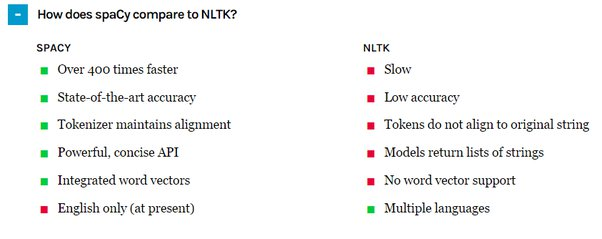

1. NLTK provides a plethora of algorithms to choose from for a particular problem which is boon for a researcher but a bane for a developer. Whereas, spaCy keeps the best algorithm for a problem in its toolkit and keep it updated as state of the art improves.

2. NLTK supports various languages whereas spaCy have statistical models for 7 languages (English, German, Spanish, French, Portuguese, Italian, and Dutch). It also supports named entities for multi language.

3. NLTK is a string processing library. It takes strings as input and returns strings or lists of strings as output. Whereas, spaCy uses object-oriented approach. When we parse a text, spaCy returns document object whose words and sentences are objects themselves.

4. spaCy has support for word vectors whereas NLTK does not.

5. As spaCy uses the latest and best algorithms, its performance is usually good as compared to NLTK. As we can see below, in word tokenization and POS-tagging spaCy performs better, but in sentence tokenization, NLTK outperforms spaCy. Its poor performance in sentence tokenization is a result of differing approaches:
  NLTK attempts to split the text into sentences. In contrast, spaCy constructs a syntactic tree for each sentence, a more robust method that yields much more information about the text.

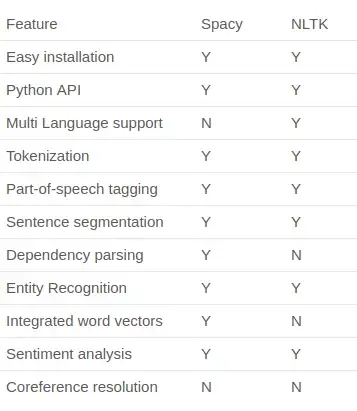

SPEED: KEY FUNCTIONALITIES — TOKENIZER, TAGGING, PARSING

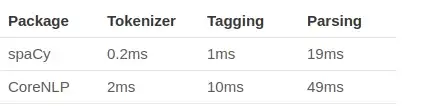

ACCURACY: ENTITY EXTRACTION


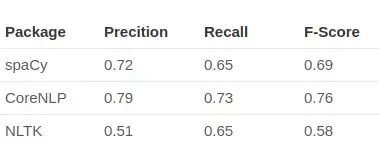

COMPARISON Between SPACY and NLTK
IMPORT

[SPACY]

  import spacy
  nlp = spacy.load(“en”)

[NLTK]

  import nltk


#2. WORD TOKENIZE

**text = """Most of the outlay will be at home. No surprise there, either. While Samsung has expanded overseas, South Korea is still host to most of its factories and research engineers. """**

####[SPACY OUTPUT]:**

  ['Most', 'of', 'the', 'outlay', 'will', 'be', 'at', 'home', '.', 'No', 'surprise', 'there', ',', 'either', '.', 'While', 'Samsung', 'has', 'expanded', 'overseas', ',', 'South', 'Korea', 'is', 'still', 'host', 'to', 'most', 'of', 'its', 'factories', 'and', 'research', 'engineers', '.']

####[NLTK OUTPUT]:**

  ['Most', 'of', 'the', 'outlay', 'will', 'be', 'at', 'home', '.', 'No', 'surprise', 'there', ',', 'either', '.', 'While', 'Samsung', 'has', 'expanded', 'overseas', ',', 'South', 'Korea', 'is', 'still', 'host', 'to', 'most', 'of', 'its', 'factories', 'and', 'research', 'engineers', '.']

#3. SENTENCE TOKENIZE

**text = """Natural Language Toolkit, or more commonly NLTK, is a suite of libraries and programs for symbolic and statistical natural language processing (NLP) for English written in the Python programming language. It was developed by Steven Bird and Edward Loper in the Department of Computer and Information Science at the University of Pennsylvania."""**

####[SPACY OUTPUT]:
  [Natural Language Toolkit, or more commonly NLTK, is a suite of libraries and programs for symbolic and statistical natural language processing (NLP) for English written in the Python programming language.,
  It was developed by Steven Bird and Edward Loper in the Department of Computer and Information Science at the University of Pennsylvania.]

####[NLTK OUTPUT]:
['Natural Language Toolkit, or more commonly NLTK, is a suite of libraries and programs for symbolic and statistical natural language processing (NLP) for English written in the Python programming language.',
'It was developed by Steven Bird and Edward Loper in the Department of Computer and Information Science at the University of Pennsylvania.']

#4. STOP WORDS REMOVAL

**text = """Most of the outlay will be at home. No surprise there, either. While Samsung has expanded overseas, South Korea is still host to most of its factories and research engineers. """ **

####[SPACY OUTPUT]:
  ['Most', 'outlay', 'home', 'No', 'surprise', 'While', 'Samsung', 'expanded', 'overseas', 'South', 'Korea', 'host', 'factories', 'research', 'engineers']

####[NLTK OUTPUT]:
  ['Most', 'outlay', 'home', '.', 'No', 'surprise', ',', 'either', '.', 'While', 'Samsung', 'expanded', 'overseas', ',', 'South', 'Korea', 'still', 'host', 'factories', 'research', 'engineers', '.']

#5. Lemma

**text = """While Samsung has expanded overseas, South Korea is still host to most of its factories and research engineers. """**

####[SPACY OUTPUT]:

  While while
  Samsung samsung
  has have
  expanded expand
  overseas overseas
  , ,
  South south
  Korea korea
  is be
  still still
  host host
  to to
  most most
  of of
  its -PRON-
  factories factory
  and and
  research research
  engineers engineer
  . .


####[NLTK OUTPUT]

  ['While', 'Samsung', 'ha', 'expanded', 'overseas', ',', 'South', 'Korea', 'is', 'still', 'host', 'to', 'most', 'of', 'it', 'factory', 'and', 'research', 'engineer', '.']


#7. get word frequency

**text = """Most of the outlay will be at home. No surprise there, either. While Samsung has expanded overseas, South Korea is still host to most of its factories and research engineers. """**

####[SPACY OUTPUT]:

  [('factories', 1), ('engineers', 1), ('No', 1), ('Most', 1), ('research', 1)]

####[NLTK OUTPUT]:

  [('factories', 1), ('still', 1), ('engineers', 1)]

#8. pos tags

**text = """Natural Language Toolkit, or more commonly NLTK."""**

####[SPACY OUTPUT]:
Natural PROPN
Language PROPN
Toolkit PROPN
, PUNCT
or CCONJ
more ADJ
commonly ADV
NLTK NOUN
. PUNCT

####[NLTK OUTPUT]:

[('Natural', 'JJ'),
 ('Language', 'NNP'),
 ('Toolkit', 'NNP'),
 (',', ','),
 ('or', 'CC'),
 ('more', 'JJR'),
 ('commonly', 'RB'),
 ('NLTK', 'NNP'),
 ('.', '.')]

#9. NER

**text = """Most of the outlay will be at home. No surprise there, either. While Samsung has expanded overseas, South Korea is still host to most of its factories and research engineers. """**

####[SPACY OUTPUT]:

  ORG ['Samsung ']
  GPE ['South Korea ']

####[NLTK OUTPUT]:
  ['Samsung', 'South Korea']